In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display

In [96]:
df = pd.read_csv("results/generated_histories--base/rho1_nu10_gamma0_eta0--history.csv")
display(df)

,step,src,dst
0,1,1,3
1,2,1,35
2,3,1,9
3,4,9,11
4,5,9,12
...,...,...,...
19995,19996,980,20
19996,19997,5753,138444
19997,19998,7210,129357
19998,19999,4375,2717


In [97]:
agents = pd.concat([df["src"], df["dst"]], ignore_index=True).unique()

In [98]:
from typing import List, Tuple

l: List[float] = []

for agent in agents:
    _df = df.copy()
    _df["active"] = (_df["src"] == agent) | (_df["dst"] == agent)
    _df["cumsum"] = _df["active"].cumsum()

    # first_step = _df.index[]
    # assert isinstance(first_step, int)
    # first_cumsum = _df.iloc[first_step]

    # last_step = _df["active"].idxmin()

    first_step: np.int64 = _df[_df["active"]].index[0]  # type: ignore
    last_step: np.int64 = _df[_df["active"]].index[-1]  # type: ignore
    first_cumsum, last_cumsum = (
        _df["cumsum"].iloc[first_step],
        _df["cumsum"].iloc[last_step],
    )

    if last_step - first_step > 0:

        # plt.plot(_df["cumsum"])
        # plt.plot([first_step, last_step], [first_cumsum, last_cumsum])
        # plt.show()

        expected = ((last_step - first_step) * (last_cumsum - first_cumsum)) / 2
        actual = _df["cumsum"].sum()

        l.append((expected - actual) / (last_step - first_step))

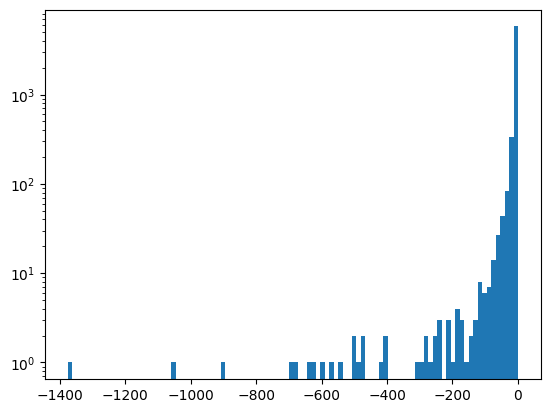

In [99]:

plt.hist(l, bins=100)
plt.yscale("log")
plt.show()